In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

df = pd.read_csv("./shopping1.csv")

df["주문일자"] = pd.to_datetime(df["주문일자"])

df["month"] = df["주문일자"].dt.month
df["year"] = df["주문일자"].dt.year

df = df.rename({"판매금액": "sales amount"}, axis=1)

print(df.head())

   주문번호             구매자  상품명  sales amount  결제방법                주문일자  처리상태  \
0     0  Fleming-Wilcox    0          5000  신용카드 2019-12-13 17:03:37  구매확정   
1     1  Fleming-Wilcox    0          5000  신용카드 2019-12-16 10:04:50  구매확정   
2     1  Fleming-Wilcox    1         67500  신용카드 2019-12-16 10:04:50  구매확정   
3     2  Fleming-Wilcox    2         30000  신용카드 2019-12-16 17:33:43  구매확정   
4     2  Fleming-Wilcox    3           750  신용카드 2019-12-16 17:33:43  구매확정   

   month  year  
0     12  2019  
1     12  2019  
2     12  2019  
3     12  2019  
4     12  2019  


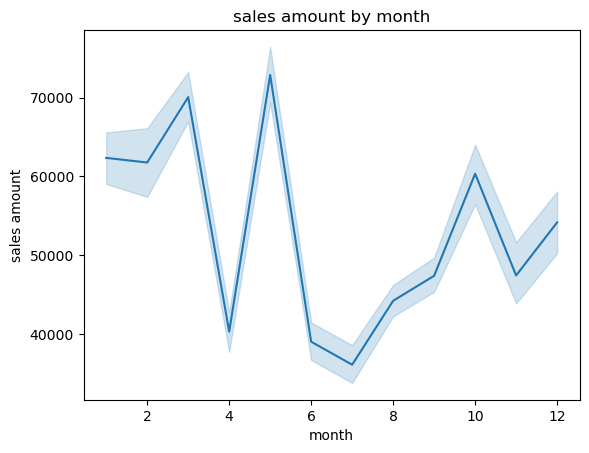

In [14]:
sns.lineplot(
    data=df,
    x="month",
    y="sales amount",
)
plt.title("sales amount by month")
plt.show()

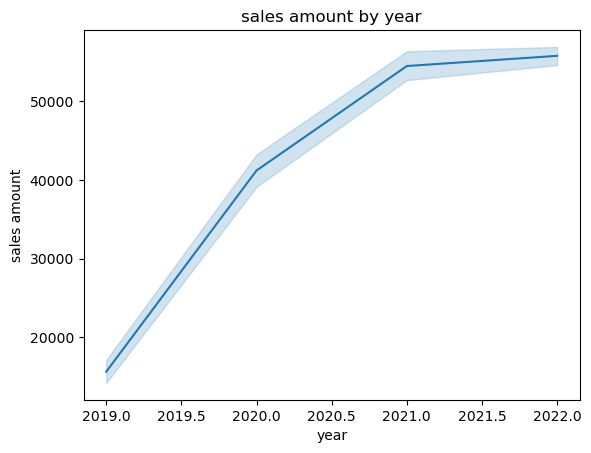

In [15]:
sns.lineplot(data=df, x="year", y="sales amount")
plt.title("sales amount by year")
plt.show()

In [16]:
group = df.groupby("상품명")


cus_sum = group["구매자"].unique().tolist()
group_sum = (
    group["sales amount"].sum().sort_values(ascending=False).head(3).index.tolist()
)

m, n = [], []

for i in range(len(group_sum)):
    m.append(df.loc[(df["상품명"] == group_sum[i]), "구매자"].count())
    n.append(str(df.loc[(df["상품명"] == group_sum[i]), "구매자"].unique()))


fig = px.bar(
    data_frame=df,
    x=group_sum,
    y=m,
    color=n,  # == hue
)

fig.update_layout(
    title="판매금액 TOP3 상품에 대한 구매자 분포도",
    xaxis_title="상품",
    yaxis_title="판매 개수",
)

fig.show()

In [28]:
df.loc[(df["상품명"] == group_sum[1]), "구매자"]

27921     Meza, Woods and Ramirez
29087     Meza, Woods and Ramirez
29561     Meza, Woods and Ramirez
29832     Meza, Woods and Ramirez
30189     Meza, Woods and Ramirez
                   ...           
217687    Meza, Woods and Ramirez
217726    Meza, Woods and Ramirez
217749    Meza, Woods and Ramirez
217762    Meza, Woods and Ramirez
218313    Meza, Woods and Ramirez
Name: 구매자, Length: 2298, dtype: object

In [29]:
df2 = pd.read_csv("./RFM_result.csv")

# print(df2.loc[df2["grade"] == "VIP", "구매자"])

df.loc[df["구매자"] == "Bond and Sons", "상품명"]

r = pd.DataFrame(df.loc[df["구매자"] == "Bond and Sons", "상품명"].unique())

plt.figure(figsize=(20, 10))

fig = px.bar(
    data_frame=df,
    x=df.loc[df["구매자"] == "Meza, Woods and Ramirez", "상품명"].value_counts().index,
    y=df.loc[df["구매자"] == "Meza, Woods and Ramirez", "상품명"].value_counts().values,
)

fig.update_layout(
    title="vip 'Bond and Sons'의 구매 물품 분포도",
    xaxis_title="상품",
    yaxis_title="판매 개수",
)

fig.show()

<Figure size 2000x1000 with 0 Axes>